In [55]:
region = 'Interior'

In [56]:
import pandas as pd
import numpy as np
from dateutil.parser import parse
from datetime import date
from matplotlib import pyplot as plt

In [57]:
from bokeh.io import output_notebook, show, output_file
output_notebook()

Loading BokehJS ...

In [58]:
from bokeh.plotting import figure, save
from bokeh.models import BoxAnnotation, Span, HoverTool

In [59]:
df = pd.read_csv('../data/parsed/cases.csv', parse_dates=['date'],)
# df_report = pd.read_csv('../data/parsed/report_date_cases.csv', parse_dates=['date'])

In [60]:
df.head()

,date,region,resident,nonresident,total
0,2020-03-03,Anchorage,3,0,3
1,2020-03-04,Anchorage,1,0,1
2,2020-03-05,Anchorage,0,0,0
3,2020-03-06,Anchorage,0,0,0
4,2020-03-07,Anchorage,1,0,1


In [61]:
df.columns

Index(['date', 'region', 'resident', 'nonresident', 'total'], dtype='object')

In [62]:
df.region.unique()

array(['Anchorage', 'Gulf Coast', 'Interior', 'MatSu', 'Northern',
       'Southeast', 'Southwest', 'Unknown', 'Statewide'], dtype=object)

In [63]:
df = df[df['region']==region].copy().set_index('date').resample('1d').mean().fillna(0)
# df_report = df_report[df_report['region']==region].copy()

In [64]:
df.tail()

,resident,nonresident,total
date,,,
2020-09-05,19.0,1.0,20.0
2020-09-06,8.0,1.0,9.0
2020-09-07,6.0,0.0,6.0
2020-09-08,10.0,0.0,10.0
2020-09-09,33.0,0.0,33.0


In [65]:
df['smoothed'] = df['resident'].rolling(7,
        win_type='gaussian',
        min_periods=3,
        center=True).mean(std=3).round()

# df_report['smoothed'] = df_report['cases'].rolling(7,
#         win_type='gaussian',
#         min_periods=3,
#         center=True).mean(std=3).round()

In [66]:
# p1 = figure(x_axis_type='datetime', title='Anchorage Daily Cases', aspect_ratio=1.75)
# # p1.xaxis.axis_label = 'Date'
# p1.yaxis.axis_label = 'Daily Total'
# p1.circle('date', 'cases', color='gray', alpha=0.7, source=df)
# p1.line('date', 'smoothed', color='blue', alpha=0.8, source=df)

# # Indicate the stay-at-home duration
# p1.add_layout(BoxAnnotation(left=parse('16 MAR 2020'), 
#                             right=parse('27 APR 2020'), 
#                             fill_color='red', 
#                             fill_alpha=0.025))

# # Indicate the mask mandate duration
# p1.add_layout(BoxAnnotation(left=parse('29 JUN 2020'), 
#                             right=date.today(), 
#                             fill_color='orange', 
#                             fill_alpha=0.05))

# # add Memorial Day Weekend start
# p1.add_layout(Span(location=parse('22 MAY 2020'),
#                           dimension='height', line_color='black',
#                           line_dash='dashed', line_width=1))

# # add Summer Solistce (only in Alaska...)
# p1.add_layout(Span(location=parse('20 JUN 2020'),
#                           dimension='height', line_color='black',
#                           line_dash='dashed', line_width=1))

# # add Independence Day Weekend
# p1.add_layout(Span(location=parse('3 JUL 2020'),
#                           dimension='height', line_color='black',
#                           line_dash='dashed', line_width=1))

# p1.add_tools(HoverTool(
#     tooltips=[
#         ('date', '@{date}{%F}'),
#         ('cases', '@cases'), # use @{ } for field names with spaces
#         ('smoothed', '@smoothed'),
#     ],
#     formatters={
#         '@{date}': 'datetime'
#     },
# ))

# # show(p1)
# # output_file('../plots/Anchorage Cases.html', mode='inline')
# # save(p1)

In [67]:
# p1 = figure(x_axis_type='datetime', title='Anchorage Daily Cases', aspect_ratio=1.75)
# # p1.xaxis.axis_label = 'Date'
# p1.yaxis.axis_label = 'Daily Total'
# # p1.circle(df['date'], df['cases'], color='gray', alpha=0.7)
# p1.line(df.index, df['smoothed'], color='blue', alpha=0.8, legend_label='Corrected')
# p1.line(df_report['date'], df_report['smoothed'], color='orange', alpha=0.8, legend_label='Report Date')

# # Indicate the stay-at-home duration
# p1.add_layout(BoxAnnotation(left=parse('16 MAR 2020'), 
#                             right=parse('27 APR 2020'), 
#                             fill_color='red', 
#                             fill_alpha=0.025))

# # Indicate the mask mandate duration
# p1.add_layout(BoxAnnotation(left=parse('29 JUN 2020'), 
#                             right=date.today(), 
#                             fill_color='orange', 
#                             fill_alpha=0.05))

# # add Memorial Day Weekend start
# p1.add_layout(Span(location=parse('22 MAY 2020'),
#                           dimension='height', line_color='black',
#                           line_dash='dashed', line_width=1))

# # add Summer Solistce (only in Alaska...)
# p1.add_layout(Span(location=parse('20 JUN 2020'),
#                           dimension='height', line_color='black',
#                           line_dash='dashed', line_width=1))

# # add Independence Day Weekend
# p1.add_layout(Span(location=parse('3 JUL 2020'),
#                           dimension='height', line_color='black',
#                           line_dash='dashed', line_width=1))

# p1.legend.location = 'top_left'

# # show(p1)
# # output_file('../plots/Anchorage Cases.html', mode='inline')
# # save(p1)

In [68]:
df['smoothed_total'] = df['total'].rolling(7,
        win_type='gaussian',
        min_periods=3,
        center=True).mean(std=3).round()

In [69]:
df['two_week_avg'] = df['total'].rolling(14).mean().round(decimals=1)
df['one_week_avg'] = df['total'].rolling(7).mean().round(decimals=1)

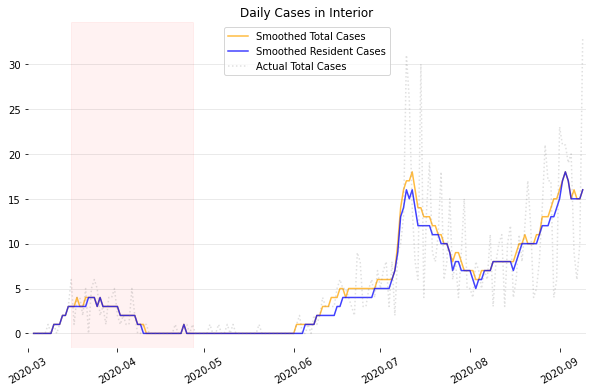

In [70]:
fig, ax = plt.subplots(figsize=(600/72,400/72))
ax.set_title('Daily Cases in ' + region)
ax.plot(df.index, df['smoothed_total'], c='orange', label='Smoothed Total Cases', linestyle='-', zorder=1, alpha=.75)
ax.plot(df.index, df['smoothed'], c='blue', label='Smoothed Resident Cases', linestyle='-', zorder=1, alpha=.75)
ax.plot(df.index, df['total'], c='gray', label='Actual Total Cases', linestyle=':', zorder=1, alpha=.25)


ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.autofmt_xdate(ha='center', )

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,y1,y2))

ax.grid(which='major', axis='y', c='k', alpha=.1, zorder=-2)

ax.axvspan(parse('16 MAR 2020'), parse('27 APR 2020'), alpha=0.05, color='red') # safer at home order

if region == 'Anchorage':
    ax.axvspan(parse('29 JUN 2020'), date.today(), alpha=0.05, color='orange') # mask mandate
    ax.axvspan(parse('3 AUG 2020'), parse('30 AUG 2020'), alpha=0.05, color='yellow') # mask mandate
    ax.annotate('Two Week Rolling Avg: ' + str(df['two_week_avg'].iloc[-1]),
                xy=(0.1, 0.3),  # theta, radius
                xytext=(0.1, 0.3),    # fraction, fraction
                textcoords='figure fraction',
                xycoords='figure fraction',
                )
    ax.annotate('One Week Rolling Avg: ' + str(df['one_week_avg'].iloc[-1]),
            xy=(0.1, 0.3),  # theta, radius
            xytext=(0.1, 0.35),    # fraction, fraction
            textcoords='figure fraction',
            xycoords='figure fraction',
            )
ax.legend()

fig.set_facecolor('w')

ax.set_xlim(pd.Timestamp('2020-03-01'), date.today())
fig.tight_layout()

In [71]:
df.tail()

,resident,nonresident,total,smoothed,smoothed_total,two_week_avg,one_week_avg
date,,,,,,,
2020-09-05,19.0,1.0,20.0,15.0,15.0,14.3,16.3
2020-09-06,8.0,1.0,9.0,15.0,16.0,14.6,17.0
2020-09-07,6.0,0.0,6.0,15.0,15.0,14.7,17.0
2020-09-08,10.0,0.0,10.0,15.0,15.0,14.9,15.1
2020-09-09,33.0,0.0,33.0,16.0,16.0,16.2,16.9


In [72]:
df['one_week_avg'].iloc[-1]

16.9